<a href="https://colab.research.google.com/github/javidee/LPNU-colab/blob/main/code/chap01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
# Get thinkdsp.py

import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

In [32]:
from thinkdsp import CosSignal, SinSignal
from thinkdsp import decorate
from IPython.display import Audio
from thinkdsp import play_wave

`read_wave` reads WAV files.  The WAV examples in the book are from freesound.org.  In the contributors section of the book, I list and thank the people who uploaded the sounds I use.

In [33]:
filename = '100475__iluppai__saxophone-weep.wav'

if not os.path.exists(filename):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/100475__iluppai__saxophone-weep.wav

In [34]:
from thinkdsp import read_wave

wave = read_wave(filename)

In [35]:
wave.make_audio()

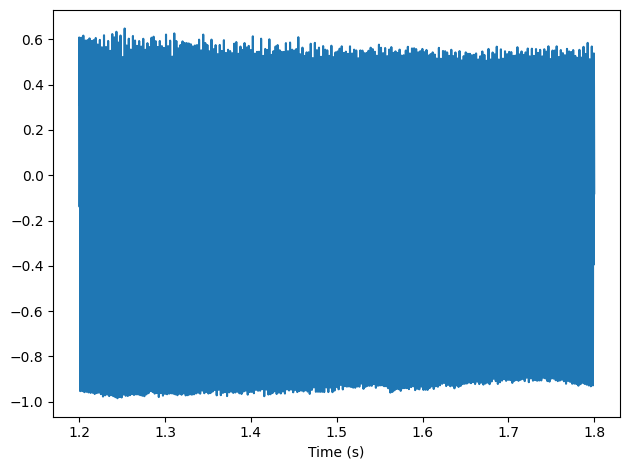

In [36]:
start = 1.2
duration = 0.6
segment = wave.segment(start, duration)
segment.plot()
decorate(xlabel='Time (s)')

In [37]:
spectrum = segment.make_spectrum()

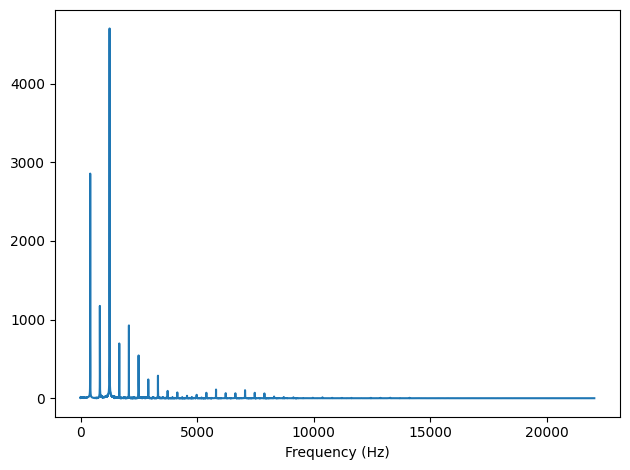

In [38]:
spectrum.plot()
decorate(xlabel='Frequency (Hz)')

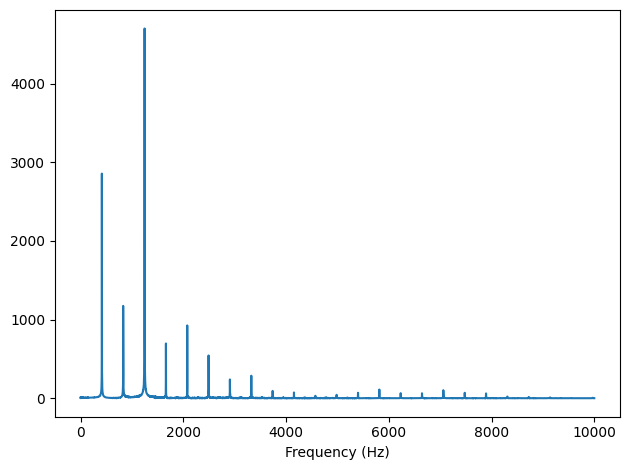

In [39]:
spectrum.plot(high=10000)
decorate(xlabel='Frequency (Hz)')

In [40]:
spectrum.low_pass(3000)
wave.make_audio()

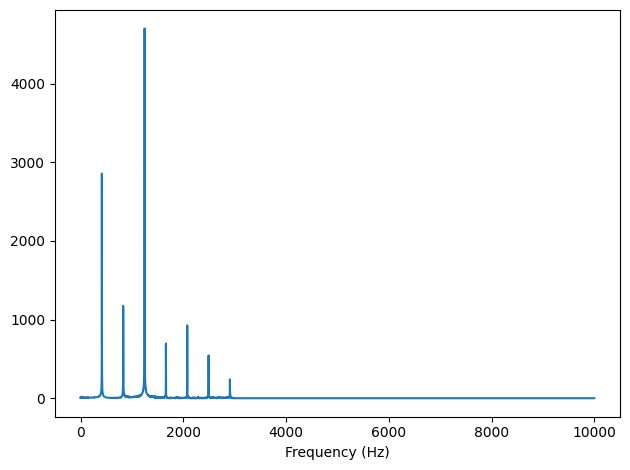

In [41]:
spectrum.plot(high=10000)
decorate(xlabel='Frequency (Hz)')

In [42]:
spectrum.high_pass(1000)
wave.make_audio()

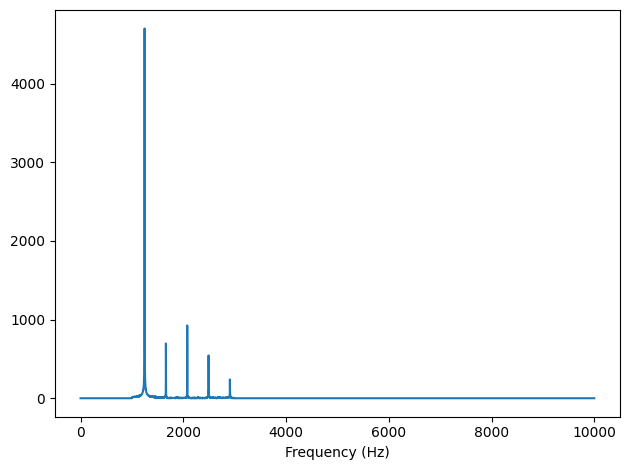

In [43]:
spectrum.plot(high=10000)
decorate(xlabel='Frequency (Hz)')

In [44]:
spectrum.band_stop(1000, 2000)
wave.make_audio()

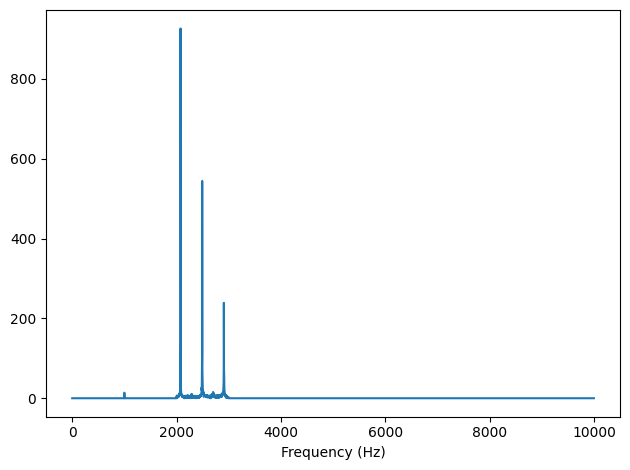

In [45]:
spectrum.plot(high=10000)
decorate(xlabel='Frequency (Hz)')

In [46]:
filtered = spectrum.make_wave()

In [47]:
filtered.normalize()

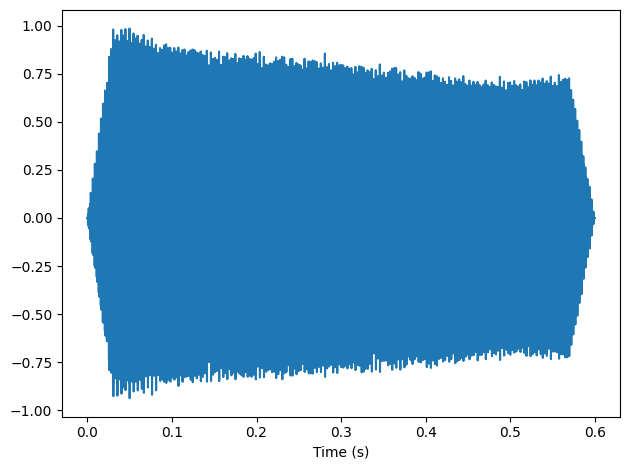

In [48]:
filtered.apodize()
filtered.plot()
decorate(xlabel='Time (s)')

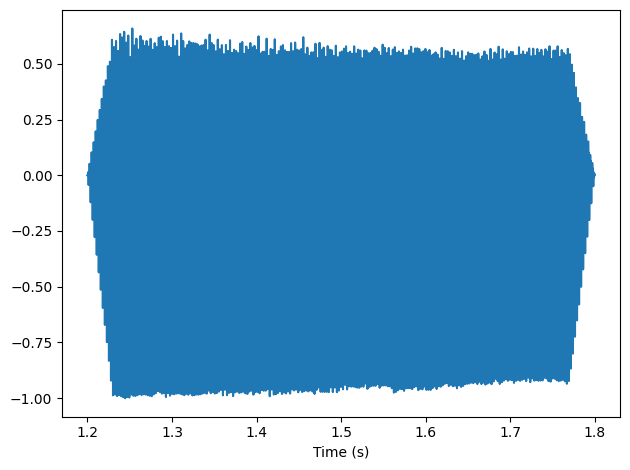

In [49]:
segment.normalize()
segment.apodize()
segment.plot()
decorate(xlabel='Time (s)')

In [50]:
segment.make_audio()

In [51]:
filtered.make_audio()

In [73]:
wave = read_wave(filename)

def stretch(wave, factor):
    wave.framerate = int(wave.framerate / factor)

stretch(wave, 2.5)

wave.make_audio()


In [52]:
import matplotlib.pyplot as plt
from IPython.display import display

def filter_wave(wave, start, duration, cutoff):
    """Selects a segment from the wave and filters it.

    Plots the spectrum and displays an Audio widget.

    wave: Wave object
    start: time in s
    duration: time in s
    cutoff: frequency in Hz
    """
    segment = wave.segment(start, duration)
    spectrum = segment.make_spectrum()

    spectrum.plot(color='0.7')
    spectrum.low_pass(cutoff)
    spectrum.plot(color='#045a8d')
    decorate(xlabel='Frequency (Hz)')
    plt.show()

    audio = spectrum.make_wave().make_audio()
    display(audio)

In [53]:
from ipywidgets import interact, fixed

wave = read_wave('100475__iluppai__saxophone-weep.wav')
interact(filter_wave, wave=fixed(wave),
         start=(0, 5, 0.1), duration=(0, 5, 0.1), cutoff=(0, 10000, 100));

interactive(children=(FloatSlider(value=2.0, description='start', max=5.0), FloatSlider(value=2.0, description…